In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target_names[iris.target]

In [3]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y) 

In [4]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)


In [7]:
# Logistic Regression (One-vs-Rest)
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(multi_class='ovr', solver='liblinear')

In [8]:
# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.78      0.88         9
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [13]:
def plot_decision_boundaries(X, y, model, title):
    h = 0.02  # mesh step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


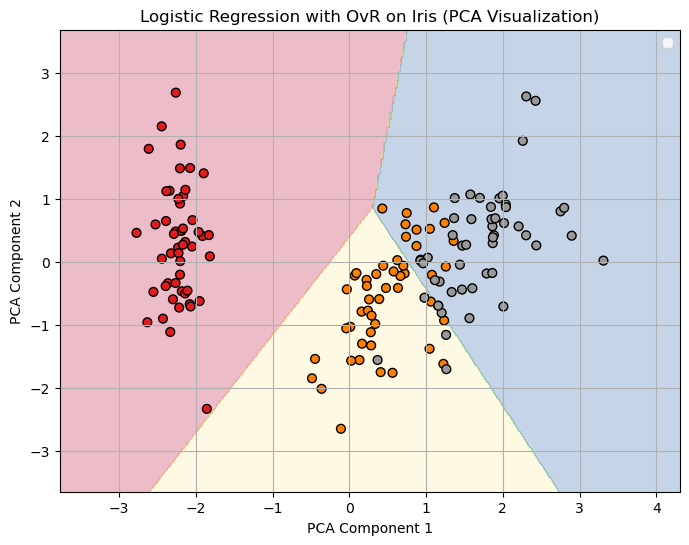

In [14]:
plot_decision_boundaries(X_pca, y_encoded, model, "Logistic Regression with OvR on Iris (PCA Visualization)")